In [8]:
load('.RData')

In [9]:
library(factoextra)
library(tidyverse)
library(NbClust)
library(ggpubr)

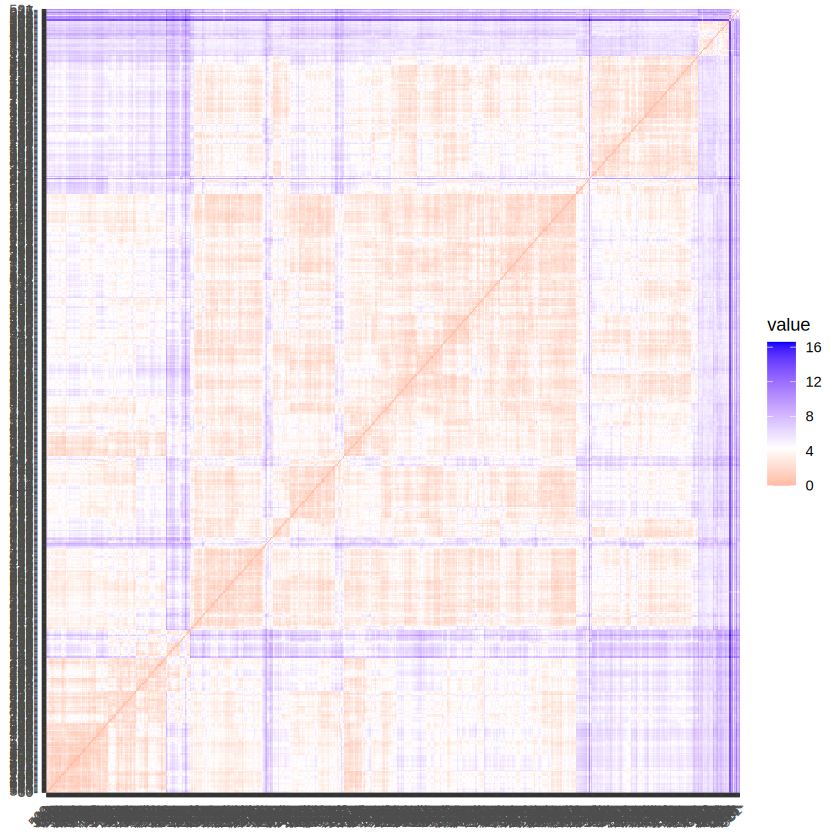

In [10]:
df.sc <- scale(df[, 1:11])
dist.eucl <- dist(df.sc, method = 'euclidean')
fviz_dist(dist.eucl)

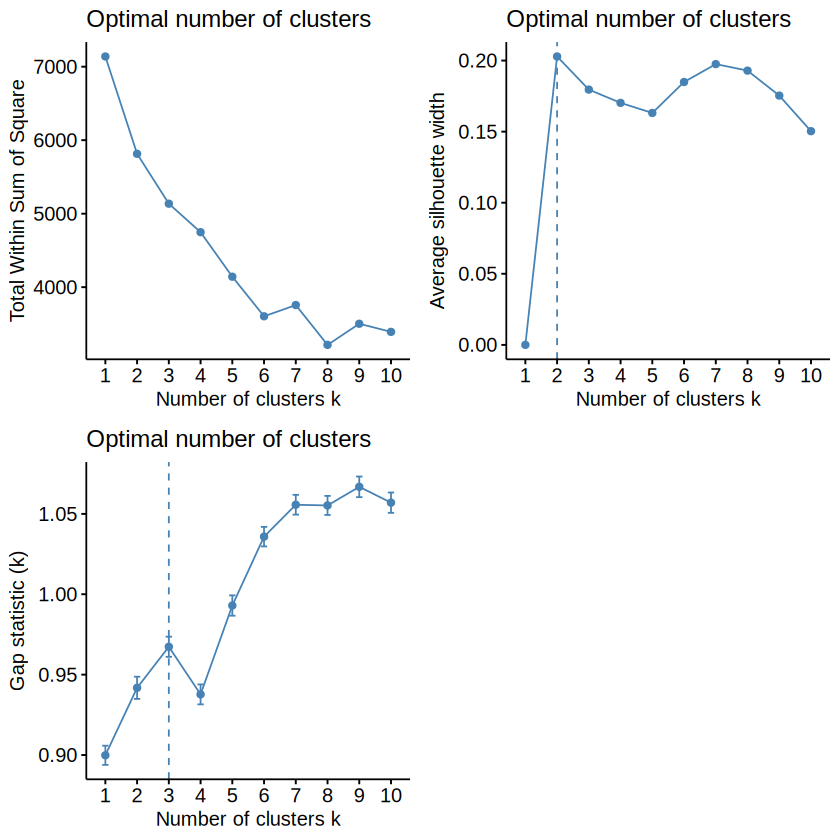

In [11]:
ggarrange(
    fviz_nbclust(df.sc, kmeans, method = 'wss'),
    fviz_nbclust(df.sc, kmeans, method = 'silhouette'),
    fviz_nbclust(df.sc, kmeans, method = 'gap_stat'),
    NULL,
    ncol = 2, nrow = 2, align = 'hv'
)

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


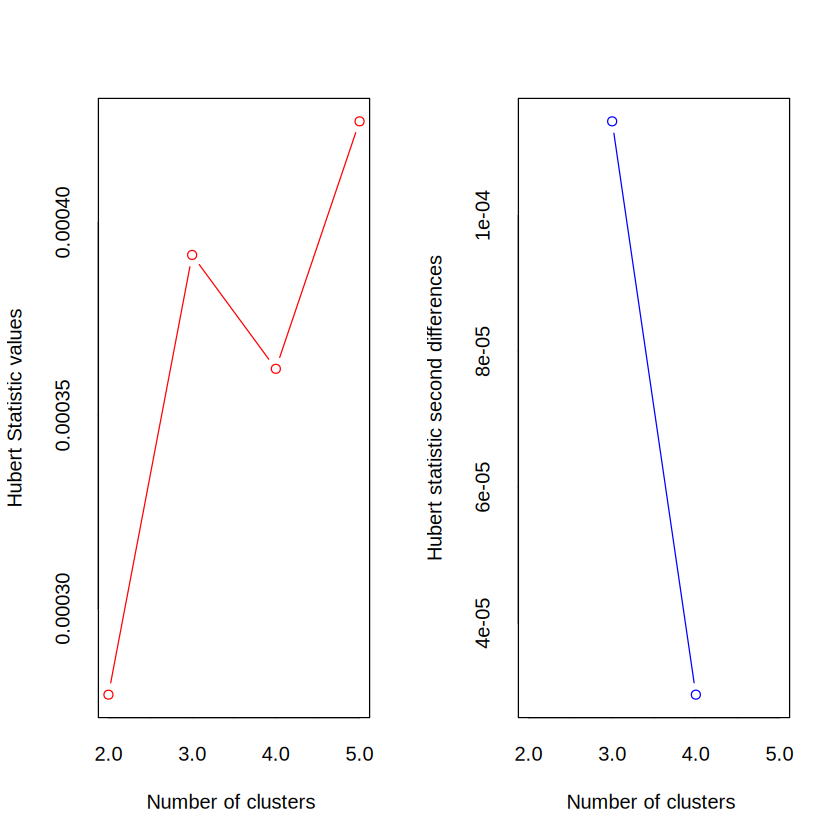

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 8 proposed 2 as the best number of clusters 
* 11 proposed 3 as the best number of clusters 
* 1 proposed 4 as the best number of clusters 
* 3 proposed 5 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  3 
 
 
******************************************************************* 


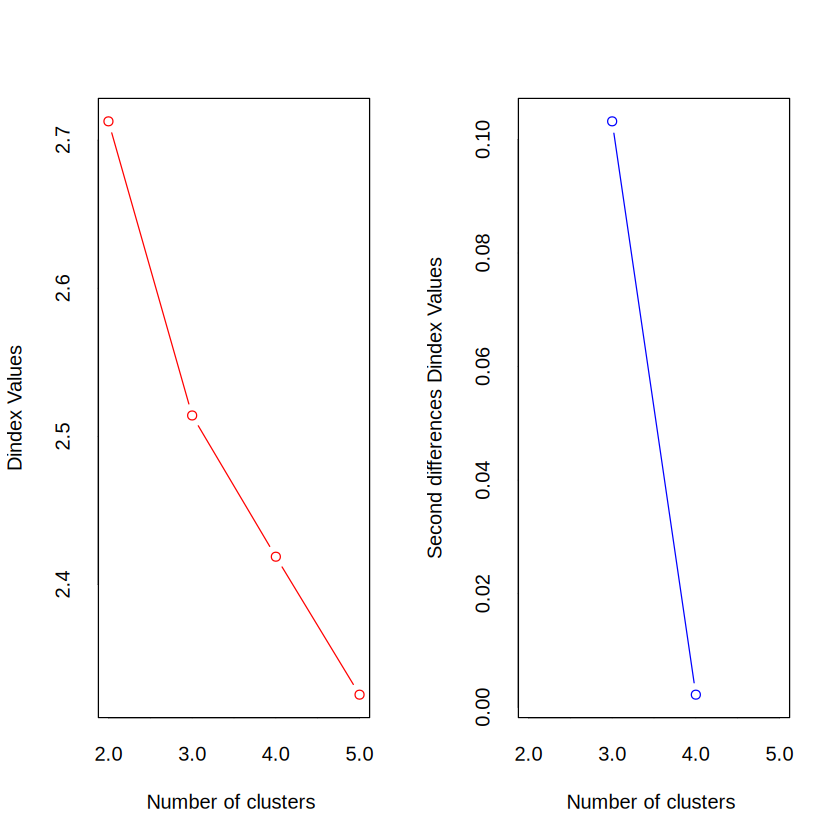

In [12]:
nb <- NbClust(df.sc, distance = 'euclidean', min.nc = 2, max.nc = 5, method = 'kmeans')

In [13]:
k2_colors <- c('#F6ED3C', '#F28123')
k3_colors <- c('#D34E24', '#563F1B', '#38726C')

Warning message:
“ggrepel: 639 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 640 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 642 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 639 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


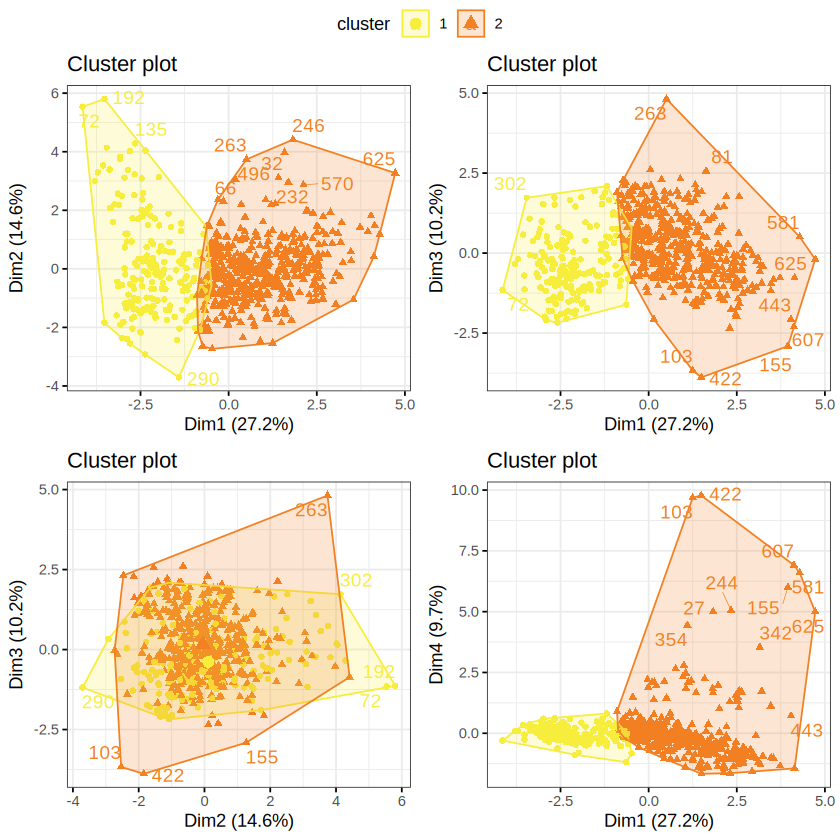

In [14]:
## k = 2
k2 <- kmeans(df.sc, 2, nstart = 25)
c1 <- fviz_cluster(k2, data = df.sc,
            axes = c(1, 2),
            repel = TRUE,
            ggtheme = theme_bw()) +
            scale_colour_manual(values = k2_colors) +
            scale_fill_manual(values = k2_colors) 


c2 <- fviz_cluster(k2, data = df.sc,
            axes = c(1, 3), 
            repel = TRUE, # Avoid label overplotting (slow)
            ggtheme = theme_bw()) +
            scale_colour_manual(values = k2_colors) +
            scale_fill_manual(values = k2_colors) 

c3 <- fviz_cluster(k2, data = df.sc,
            axes = c(2, 3), 
            repel = TRUE, # Avoid label overplotting (slow)
            ggtheme = theme_bw()) +
            scale_colour_manual(values = k2_colors) +
            scale_fill_manual(values = k2_colors) 

c4 <- fviz_cluster(k2, data = df.sc,
            axes = c(1, 4), 
            repel = TRUE, # Avoid label overplotting (slow)
            ggtheme = theme_bw()) +
            scale_colour_manual(values = k2_colors) +
            scale_fill_manual(values = k2_colors) 
ggarrange(
    c1, c2, c3, c4,
    ncol = 2, nrow = 2, align = 'hv',
    common.legend = TRUE, legend = 'top'
)

Warning message:
“ggrepel: 639 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 640 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 642 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 639 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


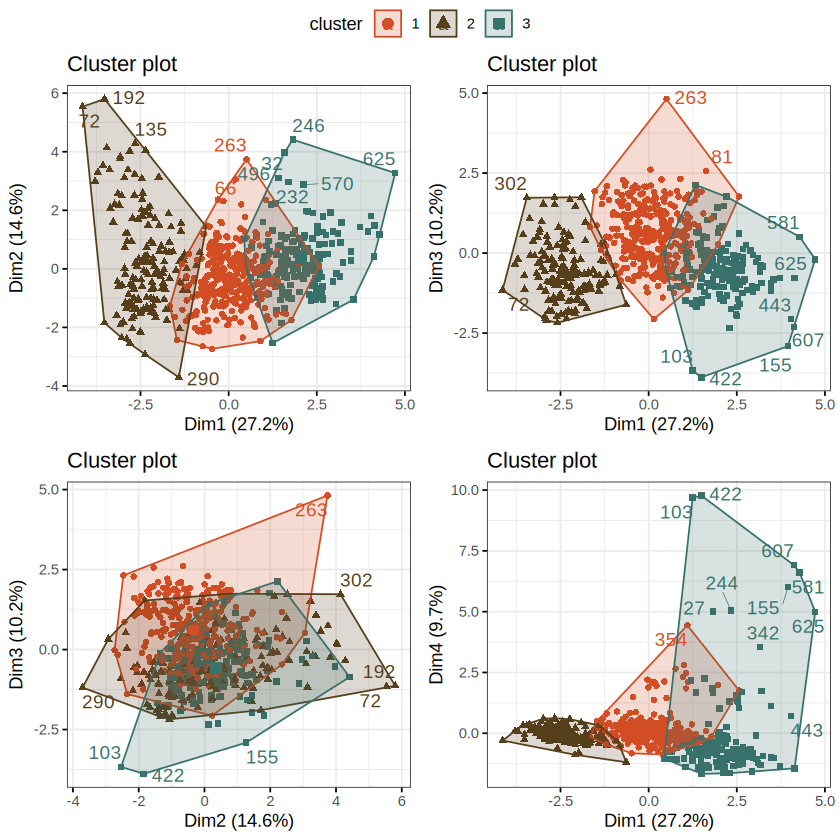

In [15]:
## k = 3
k3 <- kmeans(df.sc, 3, nstart = 25)

c1 <- fviz_cluster(k3, data = df.sc,
            axes = c(1, 2), 
            repel = TRUE, # Avoid label overplotting (slow)
            ggtheme = theme_bw()) +
            scale_colour_manual(values = k3_colors) +
            scale_fill_manual(values = k3_colors) 

c2 <- fviz_cluster(k3, data = df.sc,
            axes = c(1, 3), 
            repel = TRUE, # Avoid label overplotting (slow)
            ggtheme = theme_bw()) +
            scale_colour_manual(values = k3_colors) +
            scale_fill_manual(values = k3_colors) 

c3 <- fviz_cluster(k3, data = df.sc,
            axes = c(2, 3), 
            repel = TRUE, # Avoid label overplotting (slow)
            ggtheme = theme_bw()) +
            scale_colour_manual(values = k3_colors) +
            scale_fill_manual(values = k3_colors) 

c4 <- fviz_cluster(k3, data = df.sc,
            axes = c(1, 4), 
            repel = TRUE, # Avoid label overplotting (slow)
            ggtheme = theme_bw()) +
            scale_colour_manual(values = k3_colors) +
            scale_fill_manual(values = k3_colors) 
ggarrange(
    c1, c2, c3, c4,
    ncol = 2, nrow = 2, align = 'hv',
    common.legend = TRUE, legend = 'top'
)

In [16]:
df_cluster <- df[, 1:11]
df_cluster$quality <- factor(df$quality, levels = c('poor', 'medium', 'good'))
df_cluster$k2 <- k2$cluster
df_cluster$k3 <- k3$cluster
df_cluster$k2 <- factor(df_cluster$k2, levels = c(1, 2))
df_cluster$k3 <- factor(df_cluster$k3, levels = c(1, 2, 3))


In [17]:
summary(df_cluster)

 fixed.acidity    volatile.acidity   citric.acid     residual.sugar  
 Min.   : 4.800   Min.   :  0.110   Min.   :0.0000   Min.   : 0.900  
 1st Qu.: 6.400   1st Qu.:  0.230   1st Qu.:0.2500   1st Qu.: 1.900  
 Median : 7.000   Median :  0.300   Median :0.3100   Median : 3.200  
 Mean   : 7.168   Mean   :  5.993   Mean   :0.3235   Mean   : 5.466  
 3rd Qu.: 7.600   3rd Qu.:  0.400   3rd Qu.:0.4000   3rd Qu.: 8.200  
 Max.   :15.000   Max.   :595.000   Max.   :1.6600   Max.   :26.050  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density         
 Min.   :  0.030   Min.   : 2.00       Min.   :  7.0        Min.   :   0.9874  
 1st Qu.:  0.083   1st Qu.:17.00       1st Qu.: 80.0        1st Qu.:   0.9926  
 Median : 34.000   Median :28.00       Median :116.0        Median :   0.9952  
 Mean   : 28.751   Mean   :29.93       Mean   :113.9        Mean   :  48.3980  
 3rd Qu.: 45.000   3rd Qu.:40.00       3rd Qu.:150.8        3rd Qu.:   0.9972  
 Max.   :172.000   Max.   :87.

In [41]:
save.image()

### Validación del numero de clusters con LDA
[] Handbook of chemometric and qualimetric partB (pag 84, 99 en pdf)

In [42]:
library(caret)

In [44]:
head(df.sc)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
1,0.35387757,-0.1245628,0.1045781,-0.81930600,0.5731841,-0.3695676,0.2751009,-0.2236219,-0.6400338,1.19385673,-0.09933544
2,0.84484966,-0.1247789,0.2316356,0.28266546,0.2111517,-1.1178159,-0.4335474,-0.2236155,-1.3345612,-1.04006015,-0.01580629
3,0.68119230,-0.1150527,-0.1495369,-0.73453897,-1.1541126,0.5033889,-0.9423206,-0.2236089,0.2439103,0.21651810,-0.26639374
4,0.84484966,-0.1245628,-0.2130657,-0.77692249,0.7340873,1.0645752,1.3289883,-0.2236207,-0.5768949,-0.20234132,-0.26639374
5,0.02656285,-0.1228337,0.8669233,-0.09878620,-1.1549171,-1.6790022,-1.5419462,-0.2236334,-1.1451446,0.00708839,1.65477673
6,-0.30075187,-0.1256435,-0.7212958,-0.01401916,0.9754422,0.2539728,-0.1791608,-0.2236153,0.4964657,-0.69101063,-0.93462694


In [52]:
fit_control <- trainControl(## 10-fold CV
                           method = "repeatedcv",
                           number = 10,
                           ## repeated ten times
                           repeats = 10,
                           classProbs=TRUE)

In [80]:
### 2 clusters
df_k2.sc <- as.data.frame(df.sc)
df_k2.sc$k2 <- as.factor(paste0('c',df_cluster$k2)) ### Hay problemas cunado las clases son solo numeros
head(df_k2.sc)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,k2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0.35387757,-0.1245628,0.1045781,-0.81930600,0.5731841,-0.3695676,0.2751009,-0.2236219,-0.6400338,1.19385673,-0.09933544,c2
2,0.84484966,-0.1247789,0.2316356,0.28266546,0.2111517,-1.1178159,-0.4335474,-0.2236155,-1.3345612,-1.04006015,-0.01580629,c2
3,0.68119230,-0.1150527,-0.1495369,-0.73453897,-1.1541126,0.5033889,-0.9423206,-0.2236089,0.2439103,0.21651810,-0.26639374,c1
4,0.84484966,-0.1245628,-0.2130657,-0.77692249,0.7340873,1.0645752,1.3289883,-0.2236207,-0.5768949,-0.20234132,-0.26639374,c2
5,0.02656285,-0.1228337,0.8669233,-0.09878620,-1.1549171,-1.6790022,-1.5419462,-0.2236334,-1.1451446,0.00708839,1.65477673,c1
6,-0.30075187,-0.1256435,-0.7212958,-0.01401916,0.9754422,0.2539728,-0.1791608,-0.2236153,0.4964657,-0.69101063,-0.93462694,c2


In [82]:
set.seed(202)
index <- createDataPartition(df_k2.sc$k2, p = 0.7, list = FALSE)
train_data <- df_k2.sc[index,]
test_data <- df_k2.sc[-index, ]

table(train_data$k2)
train_balanced <- upSample(x = train_data, y = train_data$k2)
train_balanced <- train_balanced[, !(colnames(train_balanced) %in% c("Class"))]
table(train_balanced$k2)


 c1  c2 
136 320 


 c1  c2 
320 320 

In [84]:
lda_model.k2 <- train(k2 ~ ., data = train_balanced, method = 'lda', trControl = fit_control)
lda_model.k2

Linear Discriminant Analysis 

640 samples
 11 predictor
  2 classes: 'c1', 'c2' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 576, 576, 576, 576, 576, 576, ... 
Resampling results:

  Accuracy   Kappa    
  0.9689062  0.9378125


In [85]:
lda_preds.k2 <- predict(lda_model.k2, newdata = test_data)
confusionMatrix(data = lda_preds.k2, test_data$k2)

Confusion Matrix and Statistics

          Reference
Prediction  c1  c2
        c1  51   1
        c2   6 136
                                          
               Accuracy : 0.9639          
                 95% CI : (0.9271, 0.9854)
    No Information Rate : 0.7062          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9108          
                                          
 Mcnemar's Test P-Value : 0.1306          
                                          
            Sensitivity : 0.8947          
            Specificity : 0.9927          
         Pos Pred Value : 0.9808          
         Neg Pred Value : 0.9577          
             Prevalence : 0.2938          
         Detection Rate : 0.2629          
   Detection Prevalence : 0.2680          
      Balanced Accuracy : 0.9437          
                                          
       'Positive' Class : c1              
                              

In [86]:
### 3 clusters
df_k3.sc <- as.data.frame(df.sc)
df_k3.sc$k3 <- as.factor(paste0('c',df_cluster$k3)) ### Hay problemas cunado las clases son solo numeros
head(df_k3.sc)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,k3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0.35387757,-0.1245628,0.1045781,-0.81930600,0.5731841,-0.3695676,0.2751009,-0.2236219,-0.6400338,1.19385673,-0.09933544,c1
2,0.84484966,-0.1247789,0.2316356,0.28266546,0.2111517,-1.1178159,-0.4335474,-0.2236155,-1.3345612,-1.04006015,-0.01580629,c1
3,0.68119230,-0.1150527,-0.1495369,-0.73453897,-1.1541126,0.5033889,-0.9423206,-0.2236089,0.2439103,0.21651810,-0.26639374,c2
4,0.84484966,-0.1245628,-0.2130657,-0.77692249,0.7340873,1.0645752,1.3289883,-0.2236207,-0.5768949,-0.20234132,-0.26639374,c1
5,0.02656285,-0.1228337,0.8669233,-0.09878620,-1.1549171,-1.6790022,-1.5419462,-0.2236334,-1.1451446,0.00708839,1.65477673,c2
6,-0.30075187,-0.1256435,-0.7212958,-0.01401916,0.9754422,0.2539728,-0.1791608,-0.2236153,0.4964657,-0.69101063,-0.93462694,c1


In [87]:
set.seed(202)
index <- createDataPartition(df_k3.sc$k3, p = 0.7, list = FALSE)
train_data <- df_k3.sc[index,]
test_data <- df_k3.sc[-index, ]

table(train_data$k3)
train_balanced <- upSample(x = train_data, y = train_data$k3)
train_balanced <- train_balanced[, !(colnames(train_balanced) %in% c("Class"))]
table(train_balanced$k3)


 c1  c2  c3 
225 112 119 


 c1  c2  c3 
225 225 225 

In [88]:
lda_model.k3 <- train(k3 ~ ., data = train_balanced, method = 'lda', trControl = fit_control)
lda_model.k3

Linear Discriminant Analysis 

675 samples
 11 predictor
  3 classes: 'c1', 'c2', 'c3' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 607, 606, 609, 607, 607, 608, ... 
Resampling results:

  Accuracy   Kappa    
  0.9648417  0.9472614


In [89]:
lda_preds.k3 <- predict(lda_model.k3, newdata = test_data)
confusionMatrix(data = lda_preds.k3, test_data$k3)

Confusion Matrix and Statistics

          Reference
Prediction c1 c2 c3
        c1 92  0  1
        c2  2 48  0
        c3  2  0 49

Overall Statistics
                                          
               Accuracy : 0.9742          
                 95% CI : (0.9409, 0.9916)
    No Information Rate : 0.4948          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9592          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: c1 Class: c2 Class: c3
Sensitivity             0.9583    1.0000    0.9800
Specificity             0.9898    0.9863    0.9861
Pos Pred Value          0.9892    0.9600    0.9608
Neg Pred Value          0.9604    1.0000    0.9930
Prevalence              0.4948    0.2474    0.2577
Detection Rate          0.4742    0.2474    0.2526
Detection Prevalence    0.4794    0.2577    0.2629
Balanced Accuracy       0.974

In [92]:
str(lda_model.k3)

List of 24
 $ method      : chr "lda"
 $ modelInfo   :List of 13
  ..$ label     : chr "Linear Discriminant Analysis"
  ..$ library   : chr "MASS"
  ..$ loop      : NULL
  ..$ type      : chr "Classification"
  ..$ parameters:'data.frame':	1 obs. of  3 variables:
  .. ..$ parameter: chr "parameter"
  .. ..$ class    : chr "character"
  .. ..$ label    : chr "parameter"
  ..$ grid      :function (x, y, len = NULL, search = "grid")  
  ..$ fit       :function (x, y, wts, param, lev, last, classProbs, ...)  
  ..$ predict   :function (modelFit, newdata, submodels = NULL)  
  ..$ prob      :function (modelFit, newdata, submodels = NULL)  
  ..$ predictors:function (x, ...)  
  ..$ tags      : chr [1:2] "Discriminant Analysis" "Linear Classifier"
  ..$ levels    :function (x)  
  ..$ sort      :function (x)  
 $ modelType   : chr "Classification"
 $ results     :'data.frame':	1 obs. of  5 variables:
  ..$ parameter : chr "none"
  ..$ Accuracy  : num 0.965
  ..$ Kappa     : num 0.947
  ..$ A

VER
https://pages.cms.hu-berlin.de/EOL/gcg_quantitative-methods/Lab11_LDA_Model-assessment.html

In [102]:
lda_model.k3$finalModel$svd^2 / sum(lda_model.k3$finalModel$svd^2)

[1] 0.8946433 0.1053567

In [105]:
lda_model.k3$finalModel

Call:
lda(x, grouping = y)

Prior probabilities of groups:
       c1        c2        c3 
0.3333333 0.3333333 0.3333333 

Group means:
   fixed.acidity volatile.acidity citric.acid residual.sugar  chlorides
c1   -0.23565261       -0.1034340  0.04330815     -0.3397130  0.1962692
c2    0.58918049       -0.1185570 -0.48299235     -0.6666782 -1.1419090
c3   -0.05963003        0.1312104  0.24349434      1.2643619  0.5494973
   free.sulfur.dioxide total.sulfur.dioxide     density         pH  sulphates
c1         -0.04116965           0.09303281  0.02597331 -0.1955362 -0.3391687
c2         -0.86507427          -1.30419566 -0.22360618  0.7055255  0.9580544
c3          0.87695884           1.02198805  0.25659552 -0.4508978 -0.3252067
      alcohol
c1  0.4134098
c2 -0.1146801
c3 -0.7722710

Coefficients of linear discriminants:
                              LD1         LD2
fixed.acidity        -0.235721384 -0.36568933
volatile.acidity      0.128084505 -0.19415931
citric.acid           0.16687375

In [118]:
head(lda_model.k3$resample)

,Accuracy,Kappa,Resample
,<dbl>,<dbl>,<chr>
1,0.9558824,0.9338307,Fold01.Rep01
2,0.9710145,0.9565217,Fold02.Rep01
3,0.9545455,0.9318182,Fold03.Rep01
4,0.9705882,0.9558728,Fold04.Rep01
5,0.9852941,0.9779292,Fold05.Rep01
6,0.9552239,0.9328657,Fold06.Rep01


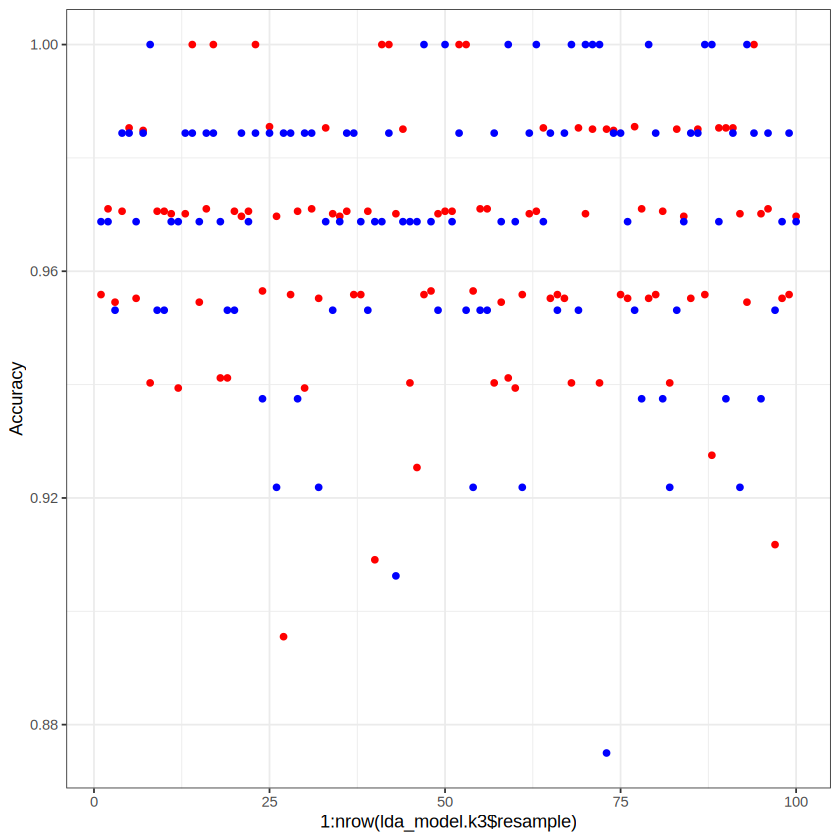

In [127]:
ggplot() +
    geom_point(data = lda_model.k3$resample, 
               aes(x = 1:nrow(lda_model.k3$resample), y = Accuracy), color = 'red') +
    geom_point(data = lda_model.k2$resample, 
               aes(x = 1:nrow(lda_model.k2$resample), y = Accuracy), color = 'blue') +
    theme_bw()